In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
#Tensorflow libs
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential# This Python 3 environment comes with many helpful analytics libraries installed
from PIL import Image

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.simplefilter("ignore")

2024-04-29 18:10:12.981628: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-29 18:10:12.981731: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-29 18:10:13.101190: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/dogs-cats-images/dataset/test_set/dogs/dog.4329.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/dogs/dog.4223.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/dogs/dog.4253.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/dogs/dog.4190.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/dogs/dog.4354.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/dogs/dog.4136.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/dogs/dog.4226.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/dogs/dog.4214.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/dogs/dog.4888.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/dogs/dog.4170.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/dogs/dog.4323.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/dogs/dog.4262.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/dogs/dog.4788.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/dogs/dog.4657.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/dogs/dog.4387.jpg
/kaggle/in

In [2]:
train_path = '../input/dogs-cats-images/dog vs cat/dataset/training_set'
test_path = '../input/dogs-cats-images/dog vs cat/dataset/test_set'

In [3]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,                # Rescale pixel values to [0, 1]
    rotation_range=20,              # Random rotation within 20 degrees
    shear_range = 0.2,
    zoom_range = 0.2,
    width_shift_range=0.2,          # Random horizontal shift by 20% of image width
    height_shift_range=0.2,         # Random vertical shift by 20% of image height
    horizontal_flip=True,           # Random horizontal flipping
    fill_mode='nearest'             # Fill mode for new pixels after shifts/rotations
)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
# Defining image size and batch size
img_size = 150
batch_size = 32

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_path,                     # Path to the training data
    target_size=(img_size, img_size),  # Resize images to this size
    batch_size=batch_size,           # Number of images in each batch
    seed=32,                         # Optional: Set a random seed for shuffling
    shuffle=True,                    # Shuffle the data during training
    class_mode='categorical'        # Mode for class labels (categorical for one-hot encoding)
)

test_generator = test_datagen.flow_from_directory(test_path,
                                            target_size = (img_size, img_size),
                                            batch_size = batch_size,
                                            class_mode = 'categorical')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [6]:
# Get the class labels
class_labels = list(train_generator.class_indices.keys())

# Calculate the count of images per class
class_counts = {label: 0 for label in class_labels}

for i in range(len(train_generator)):
    batch_data, batch_labels = train_generator[i]
    for j in range(len(batch_data)):
        class_idx = int(batch_labels[j].argmax())
        class_label = class_labels[class_idx]
        class_counts[class_label] += 1

In [7]:
# Defining the model architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_fit = model.fit(train_generator,epochs=50,validation_data=test_generator)

Epoch 1/50


2024-04-29 18:12:13.546446: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 7.01362, expected 6.05938
2024-04-29 18:12:13.546513: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 6.59738, expected 5.64314
2024-04-29 18:12:13.546528: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 7.60386, expected 6.64961
2024-04-29 18:12:13.546547: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 7.47181, expected 6.51757
2024-04-29 18:12:13.546561: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 7.76316, expected 6.80892
2024-04-29 18:12:13.546572: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 6.80827, expected 5.85402
2024-04-29 18:12:13.546582: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 6.93282, expected 5.97858
2024-04-29 18:12:13.546593: E external/local_xla/xla/se

  1/250 ━━━━━━━━━━━━━━━━━━━━ 35:32 9s/step - accuracy: 0.4688 - loss: 0.6940

I0000 00:00:1714414337.360463      83 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


247/250 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.4821 - loss: 1.0129

2024-04-29 18:13:25.637431: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21904: 8.67349, expected 7.67828
2024-04-29 18:13:25.637500: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21905: 8.30703, expected 7.31181
2024-04-29 18:13:25.637509: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21906: 8.29129, expected 7.29607
2024-04-29 18:13:25.637517: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21910: 8.83682, expected 7.8416
2024-04-29 18:13:25.637525: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21911: 8.24576, expected 7.25055
2024-04-29 18:13:25.637533: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21912: 7.30326, expected 6.30804
2024-04-29 18:13:25.637541: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21913: 7.68038, expected 6.68516
2024-04-29 18:13:25.637549: 

250/250 ━━━━━━━━━━━━━━━━━━━━ 78s 278ms/step - accuracy: 0.4822 - loss: 1.0090 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 57s 223ms/step - accuracy: 0.4923 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 58s 227ms/step - accuracy: 0.4944 - loss: 0.6938 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 58s 226ms/step - accuracy: 0.5062 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 57s 223ms/step - accuracy: 0.5038 - loss: 0.6933 - val_accuracy: 0.5355 - val_loss: 0.6926
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 83s 225ms/step - accuracy: 0.5129 - loss: 0.7001 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 57s 222ms/step - accuracy: 0.5058 - loss: 0.6932 - val_accuracy: 0.5435 - val_loss: 0.6872
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 60s 232ms/step - accuracy: 0.5276 - loss: 0.6931 - val

In [8]:
# Evaluate on test dataset
score = model.evaluate(test_generator, verbose=False)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.344686359167099
Test accuracy: 0.8510000109672546


# Accuracy graph

<Figure size 640x480 with 0 Axes>

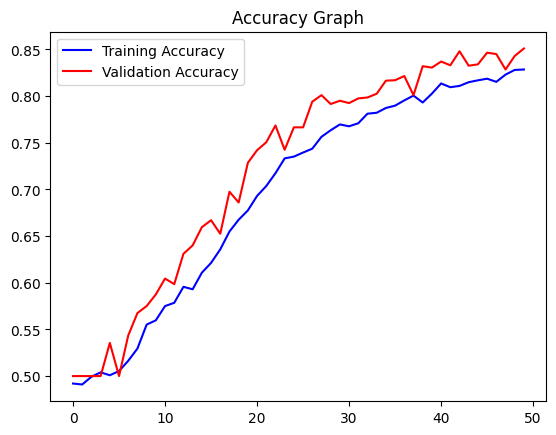

<Figure size 640x480 with 0 Axes>

In [9]:
acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

# Loss Graph

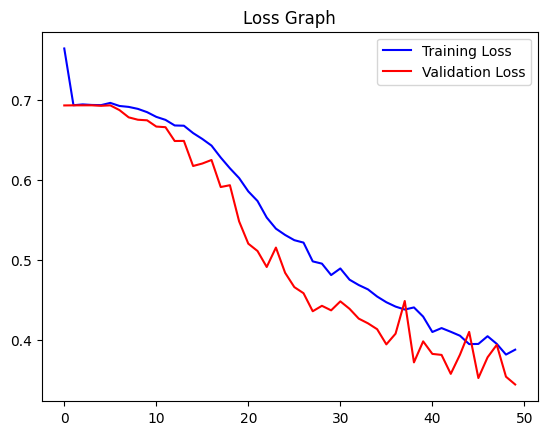

In [10]:
loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

# Prediction From Test data

63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step


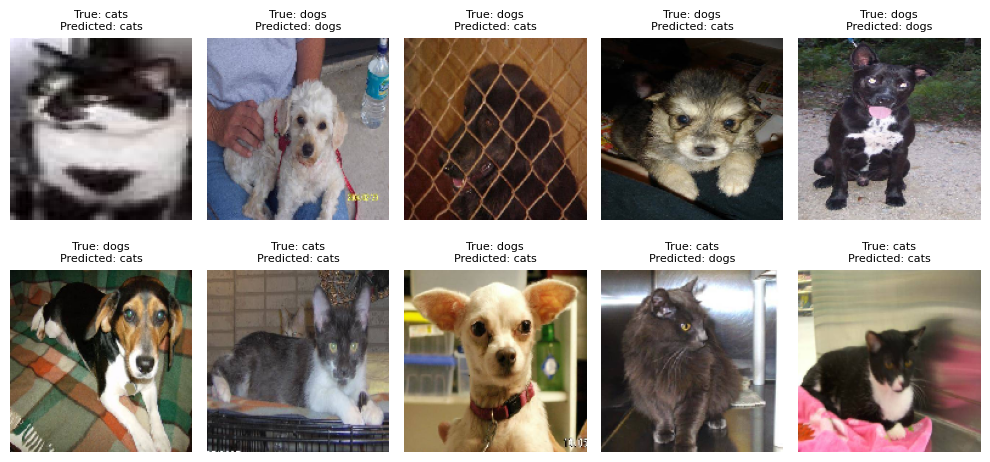

In [11]:
# Make predictions on the test data
predictions = model.predict(test_generator)

# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Collect true labels and model predictions
true_labels = test_generator.classes
class_names = list(test_generator.class_indices.keys())  # Convert keys view to a list

# Plot true labels and predicted labels
plt.figure(figsize=(10, 5))
num_samples_to_display = min(10, len(test_generator))  # Display up to 10 samples or less if available
for i in range(num_samples_to_display):
    x_batch, y_batch = test_generator[i]
    true_label = np.argmax(y_batch)  # Convert one-hot encoded label to class index
    predicted_label = predicted_labels[i]
    true_class_label = class_names[true_label]
    predicted_class_label = class_names[predicted_label]

    # Display the first image in the batch
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_batch[0])  # Select the first image from the batch
    plt.title(f'True: {true_class_label}\nPredicted: {predicted_class_label}', fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()
